In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

%matplotlib ipympl

In [2]:
# Function to create response surface
def create_response_surface(data, input_cols, output_cols, grid_resolution=100):
    # Extract input and output data
    X = data[input_cols].values
    y = data[output_cols].values
    
    # Define grid
    x1_min, x1_max = min(X[:, 0]), max(X[:, 0])
    x2_min, x2_max = min(X[:, 1]), max(X[:, 1])
    x1_range = np.linspace(x1_min, x1_max, grid_resolution)
    x2_range = np.linspace(x2_min, x2_max, grid_resolution)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    
    # Interpolate
    grid = np.column_stack((x1_grid.flatten(), x2_grid.flatten()))
    z_grid = griddata(X, y, grid, method='linear').reshape(x1_grid.shape)
    
    return x1_grid, x2_grid, z_grid

In [3]:
# Function to plot response surface
def plot_response_surface(x1_grid, x2_grid, z_grid, input_labels, output_labels):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x1_grid, x2_grid, z_grid, cmap='viridis')
    ax.set_xlabel(input_labels[0])
    ax.set_ylabel(input_labels[1])
    ax.set_zlabel(output_labels)
    plt.show()

In [4]:
# Read data from CSV
data = pd.read_csv('data.csv', delimiter='\t')

data

,Hardness (Shore A),Poisson's ratio,Young's Modulus,Shear Modulus,Axial,Radial,Torsional,Conical,Effective
0,50,0.490000,2.456000,0.824000,-2.969314,-2.482708,-1.523157,-4.488685,11.463864
1,60,0.490000,3.605000,1.210000,-1.703517,-1.403603,-0.718470,-2.759062,6.584652
2,80,0.490000,9.351000,3.138000,-0.042478,0.083703,0.337341,-0.442689,0.906212
3,85,0.490000,13.182000,4.424000,0.260527,0.346468,0.529955,-0.025743,1.162692
4,80,0.499500,9.351000,3.118000,-0.047935,0.451761,0.333270,-0.199599,1.032565
5,75,0.499999,7.052854,2.350953,-0.384837,0.402259,0.124816,-0.030816,0.942728
6,70,0.499999,5.520507,1.840170,-0.768230,0.264084,-0.117601,-0.195836,1.345751
7,80,0.495000,9.351000,3.128000,-0.045211,0.261336,0.335252,-0.327338,0.969136
8,75,0.495000,7.053000,2.359000,-0.385880,0.030377,0.118567,-0.753353,1.288177


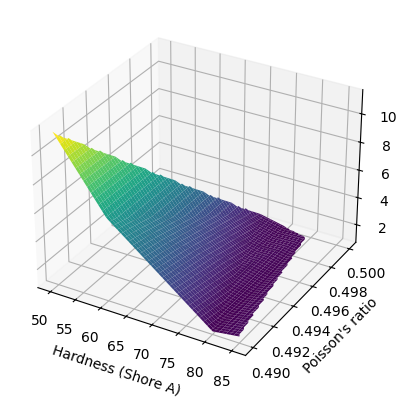

In [5]:
# Define input and output columns
input_cols = ["Hardness (Shore A)", "Poisson's ratio"]  # Specify input parameter columns
output_cols = 'Effective'  # Specify output response column

# Create response surface
x1_grid, x2_grid, z_grid = create_response_surface(data, input_cols, output_cols)

# Plot response surface
plot_response_surface(x1_grid, x2_grid, z_grid, input_cols, output_cols)